## Imports

In [1]:
# Pandas is an open source data analysis and manipulation tool
import pandas as pd
from pandas.api.types import CategoricalDtype
# library to create visualizations
import seaborn as sns
# library to create visualizations
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

## Load DataFrame

In [28]:
path = "C:/Users/Jan/Documents/Python_Projects/Bachelorthesis/Bachelorthesis/Analysis/DataFrames/"

# load unexploded
path_news = "All_news_articles.csv"
News_DataFrame = pd.read_csv(path+path_news, index_col=None,header=0)
News_DataFrame["Date_Info"] = pd.to_datetime(News_DataFrame["Date_Info"], format='%Y-%m-%d')

# load exploded
fileName_exploded ="All_news_articles_exploded.csv"
News_DataFrame_exploded = pd.read_csv(path+fileName_exploded, index_col=None,header=0)
News_DataFrame_exploded["Date_Info"] = pd.to_datetime(News_DataFrame_exploded["Date_Info"], format='%Y-%m-%d')
uninteresting_titles= ["Der", "Die", "Das","Was","Warum","Er","Sie", "Es", "Ich", "Du", "Mit","Wie","Ein","So","Wir","Nach","Am","An","B","Bei","Beim","Bin","Bis","Co","Da","Hier","Diese","Darum","Mehr","Jetzt","Wer","A","C",":","»","«", "," ,"\'\'","``", "_","-" ".","?","–", "-",".","!","(",")","„","“","<",">","außer","Wenn","Alles","In","Neue","Wegen","Zwei","Für","Eine","Aus","Eins","Drei","Vier","Fünf"]
News_DataFrame_exploded=News_DataFrame_exploded[~News_DataFrame_exploded.Tokens.isin(uninteresting_titles)]

# Not exploded
# Spiegel
Spiegel_DataFrame = News_DataFrame.loc[News_DataFrame["News_page"] == "Spiegel"]
# Sueddeutsche
Sueddeutsche_DataFrame = News_DataFrame.loc[News_DataFrame["News_page"] == "Sueddeutsche"]
# Bild
Bild_DataFrame = News_DataFrame.loc[News_DataFrame["News_page"] == "Bild"]

# Exploded
# Spiegel
Spiegel_DataFrame_exploded = News_DataFrame_exploded.loc[News_DataFrame_exploded["News_page"] == "Spiegel"]
# Sueddeutsche
Sueddeutsche_DataFrame_exploded = News_DataFrame_exploded.loc[News_DataFrame_exploded["News_page"] == "Sueddeutsche"]
# Bild
Bild_DataFrame_exploded = News_DataFrame_exploded.loc[News_DataFrame_exploded["News_page"] == "Bild"]

C:\Users\Jan\AppData\Local\Temp\ipykernel_20084\487304295.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  News_DataFrame = pd.read_csv(path+path_news, index_col=None,header=0)
C:\Users\Jan\AppData\Local\Temp\ipykernel_20084\487304295.py:10: DtypeWarning: Columns (1,5,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  News_DataFrame_exploded = pd.read_csv(path+fileName_exploded, index_col=None,header=0)


# Publishing Analysis

## Ammount of published news

In [29]:
News_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180327 entries, 0 to 180326
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Titel                  180326 non-null  object        
 1   Overline               156493 non-null  object        
 2   Date_Info              180327 non-null  datetime64[ns]
 3   Kategorie              177967 non-null  object        
 4   URL                    180327 non-null  object        
 5   detailed_informations  73316 non-null   object        
 6   bild_plus              39821 non-null   object        
 7   Zugriff_Datum          160013 non-null  float64       
 8   News_page              180327 non-null  object        
 9   author                 29356 non-null   object        
 10  Breadcrumb             80846 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 15.1+ MB


### Spiegel

In [4]:
Spiegel_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20314 entries, 39821 to 60134
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Titel                  20314 non-null  object        
 1   Overline               0 non-null      object        
 2   Date_Info              20314 non-null  datetime64[ns]
 3   Kategorie              20314 non-null  object        
 4   URL                    20314 non-null  object        
 5   detailed_informations  0 non-null      object        
 6   bild_plus              0 non-null      object        
 7   Zugriff_Datum          0 non-null      float64       
 8   News_page              20314 non-null  object        
 9   author                 5932 non-null   object        
 10  Breadcrumb             0 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 1.9+ MB


## Sueddeutsche

In [5]:
Sueddeutsche_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120192 entries, 60135 to 180326
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Titel                  120192 non-null  object        
 1   Overline               116673 non-null  object        
 2   Date_Info              120192 non-null  datetime64[ns]
 3   Kategorie              120188 non-null  object        
 4   URL                    120192 non-null  object        
 5   detailed_informations  33496 non-null   object        
 6   bild_plus              0 non-null       object        
 7   Zugriff_Datum          120192 non-null  float64       
 8   News_page              120192 non-null  object        
 9   author                 23424 non-null   object        
 10  Breadcrumb             80846 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 11.0+ MB


## Bild

In [6]:
Bild_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39821 entries, 0 to 39820
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Titel                  39820 non-null  object        
 1   Overline               39820 non-null  object        
 2   Date_Info              39821 non-null  datetime64[ns]
 3   Kategorie              37465 non-null  object        
 4   URL                    39821 non-null  object        
 5   detailed_informations  39820 non-null  object        
 6   bild_plus              39821 non-null  object        
 7   Zugriff_Datum          39821 non-null  float64       
 8   News_page              39821 non-null  object        
 9   author                 0 non-null      object        
 10  Breadcrumb             0 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 3.6+ MB


## Ammount of published news by media house

In [7]:
published_news.News_page.sort_values().reset_index()

NameError: name 'published_news' is not defined

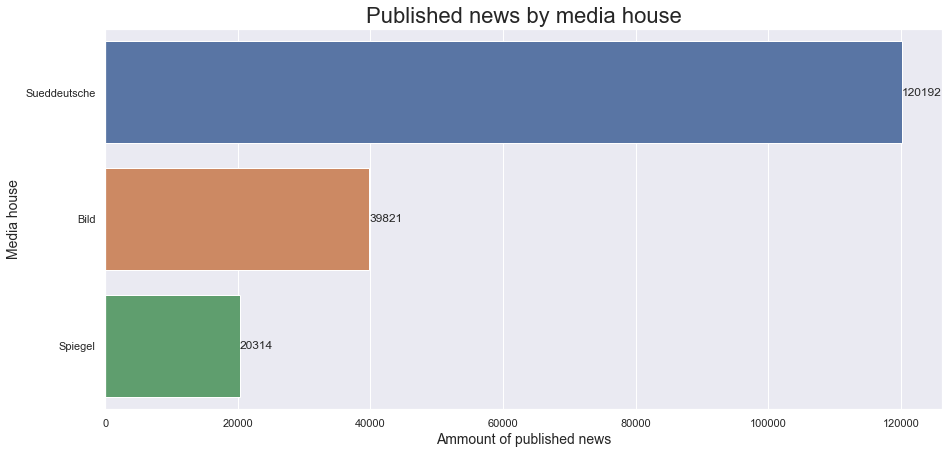

In [9]:
published_news = pd.DataFrame(News_DataFrame.News_page.value_counts())
#ranks for colorgrading
sns.set(rc={'figure.figsize':(15,7)})

ax = sns.barplot(x = "News_page", y=published_news.index, data=published_news,orient="h", )
ax.bar_label(ax.containers[0])
plt.title("Published news by media house",fontsize=22)
plt.xlabel('Ammount of published news', fontsize=14);
plt.ylabel('Media house', fontsize=14);

save_fig(ax, "Publishing Analysis/Ammount of published news by media house")

## Ammount of published news by author Sueddeutsche

DPA author: 80846
Sueddeutsche author: 23424
Unmentioned author: 15922


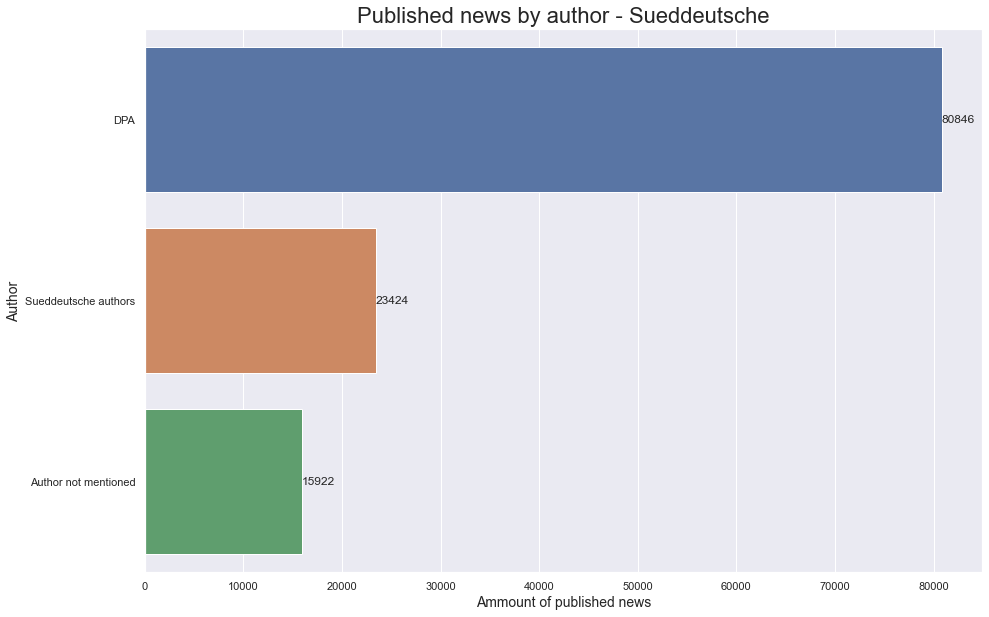

In [10]:
ammount_DPA_article = len(Sueddeutsche_DataFrame[Sueddeutsche_DataFrame["Breadcrumb"] == "dpa"])
ammount_Sueddeutsche_author_article = len(Sueddeutsche_DataFrame[~Sueddeutsche_DataFrame["author"].isnull()])
ammount_unmentioned_authors = len(Sueddeutsche_DataFrame) - ammount_DPA_article - ammount_Sueddeutsche_author_article
df = pd.DataFrame([["DPA", ammount_DPA_article],["Sueddeutsche authors",ammount_Sueddeutsche_author_article],["Author not mentioned",ammount_unmentioned_authors]],columns=["Author","Ammount_of_published_articles"])

print(f"DPA author: {ammount_DPA_article}")
print(f"Sueddeutsche author: {ammount_Sueddeutsche_author_article}")
print(f"Unmentioned author: {ammount_unmentioned_authors}")

ax = sns.barplot(x = df.Ammount_of_published_articles, y="Author", data=df,orient="h")
ax.bar_label(ax.containers[0])

plt.title("Published news by author - Sueddeutsche",fontsize=22)
plt.xlabel('Ammount of published news', fontsize=14);
plt.ylabel('Author', fontsize=14);
save_fig(ax, "Publishing Analysis/Ammount of published news author sueddeutsche")

## Ammount of published articles by author SPIEGEL

Author mentioned: 5932
Author not mentioned: 14382


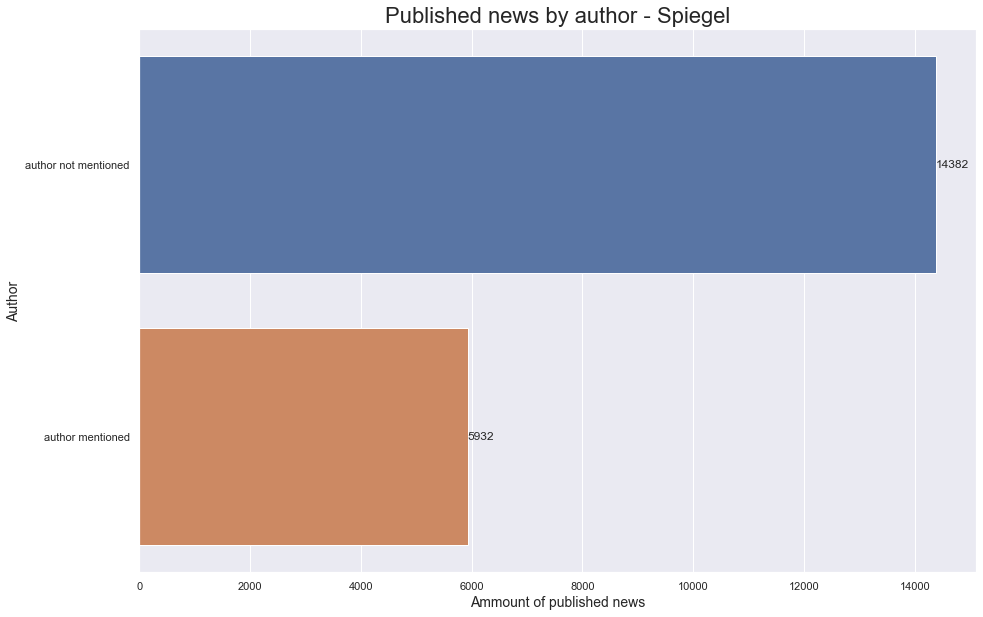

In [11]:
author_mentioned = len(Spiegel_DataFrame[~Spiegel_DataFrame["author"].isnull()])
author_not_mentioned = len(Spiegel_DataFrame[Spiegel_DataFrame["author"].isnull()])
df = pd.DataFrame([["author not mentioned",author_not_mentioned],["author mentioned", author_mentioned]],columns=["Author","Ammount_of_published_articles"])

print(f"Author mentioned: {author_mentioned}")
print(f"Author not mentioned: {author_not_mentioned}")

ax = sns.barplot(x = df.Ammount_of_published_articles, y="Author", data=df,orient="h")
ax.bar_label(ax.containers[0])
plt.title("Published news by author - Spiegel",fontsize=22)
plt.xlabel('Ammount of published news', fontsize=14);
plt.ylabel('Author', fontsize=14);
save_fig(ax, "Publishing Analysis/Ammount of published news author spiegel")

## Published articles by weekday

In [12]:
day_size_order = CategoricalDtype(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', "Saturday", "Sunday"],
    ordered=True
)

## Published articles by weekday - Spiegel

C:\Users\Jan\AppData\Local\Temp\ipykernel_20084\3240458907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spiegel_DataFrame["weekday_name"] = Spiegel_DataFrame['Date_Info'].dt.day_name()
C:\Users\Jan\AppData\Local\Temp\ipykernel_20084\3240458907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spiegel_DataFrame['weekday_name'] = Spiegel_DataFrame['weekday_name'].astype(day_size_order)


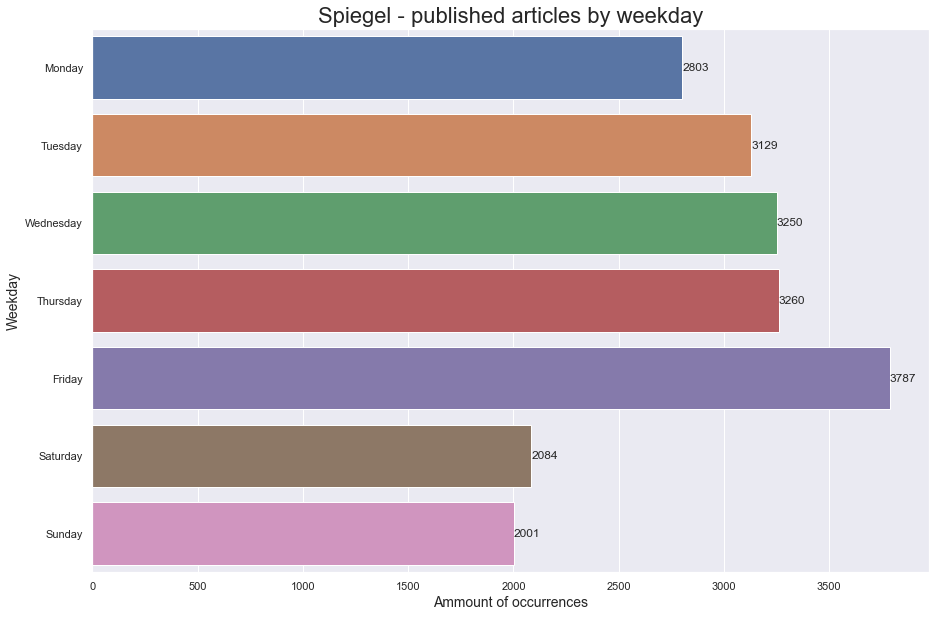

In [13]:
Spiegel_DataFrame["weekday_name"] = Spiegel_DataFrame['Date_Info'].dt.day_name()

Spiegel_DataFrame['weekday_name'] = Spiegel_DataFrame['weekday_name'].astype(day_size_order)

weekday_count = Spiegel_DataFrame["weekday_name"].value_counts().sort_values()
values = weekday_count.values
keys = weekday_count.keys()


ax = sns.barplot(x = values, y=keys,orient="h")
ax.bar_label(ax.containers[0])

plt.title("Spiegel - published articles by weekday",fontsize=22)
plt.xlabel('Ammount of occurrences', fontsize=14);
plt.ylabel('Weekday', fontsize=14);

save_fig(ax, "Publishing Analysis/Published articles by weekday Spiegel")

## Published articles by weekday - Sueddeutsche

C:\Users\Jan\AppData\Local\Temp\ipykernel_20084\2038114266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sueddeutsche_DataFrame["weekday_name"] = Sueddeutsche_DataFrame['Date_Info'].dt.day_name()
C:\Users\Jan\AppData\Local\Temp\ipykernel_20084\2038114266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sueddeutsche_DataFrame['weekday_name'] = Sueddeutsche_DataFrame['weekday_name'].astype(day_size_order)


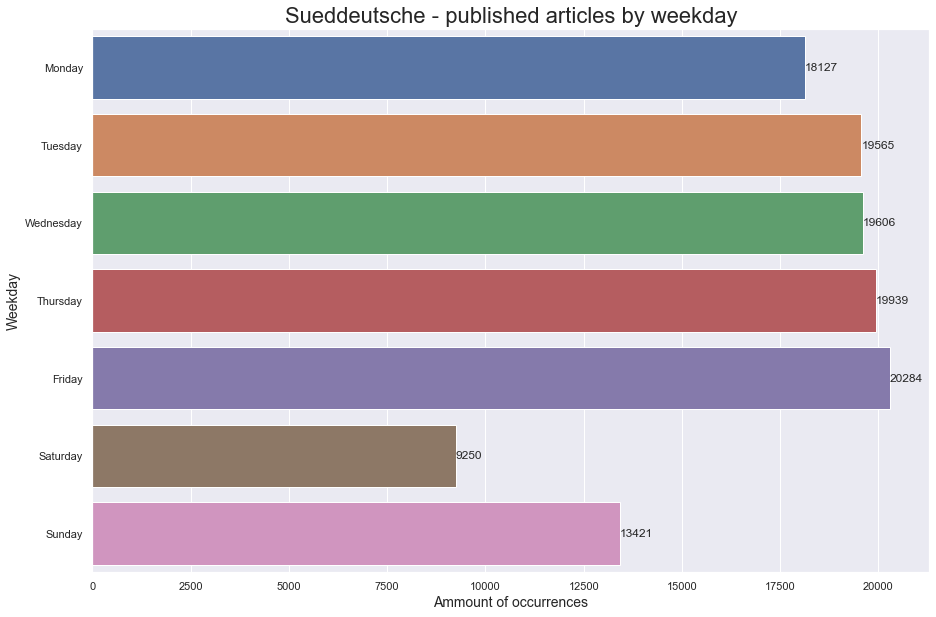

In [14]:
Sueddeutsche_DataFrame["weekday_name"] = Sueddeutsche_DataFrame['Date_Info'].dt.day_name()

Sueddeutsche_DataFrame['weekday_name'] = Sueddeutsche_DataFrame['weekday_name'].astype(day_size_order)

weekday_count = Sueddeutsche_DataFrame["weekday_name"].value_counts().sort_values()
values = weekday_count.values
keys = weekday_count.keys()

ax = sns.barplot(x = values, y=keys,orient="h")
ax.bar_label(ax.containers[0])

plt.title("Sueddeutsche - published articles by weekday",fontsize=22)
plt.xlabel('Ammount of occurrences', fontsize=14);
plt.ylabel('Weekday', fontsize=14);

save_fig(ax, "Publishing Analysis/Published articles by weekday Sueddeutsche")

## Published articles by weekday - Bild

C:\Users\Jan\AppData\Local\Temp\ipykernel_20084\2697271386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bild_DataFrame["weekday_name"] = Bild_DataFrame['Date_Info'].dt.day_name()
C:\Users\Jan\AppData\Local\Temp\ipykernel_20084\2697271386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bild_DataFrame['weekday_name'] = Bild_DataFrame['weekday_name'].astype(day_size_order)


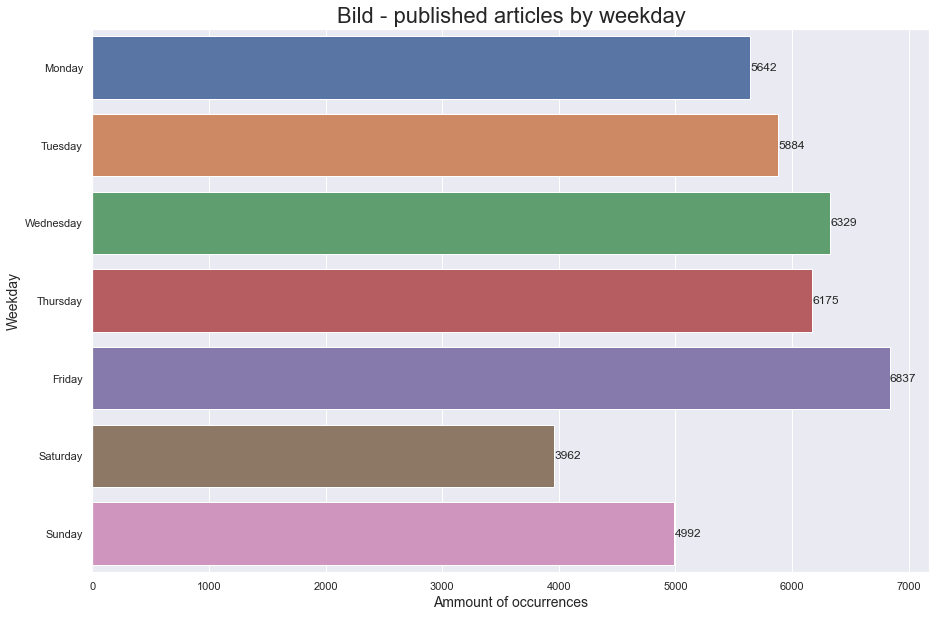

In [15]:
Bild_DataFrame["weekday_name"] = Bild_DataFrame['Date_Info'].dt.day_name()

Bild_DataFrame['weekday_name'] = Bild_DataFrame['weekday_name'].astype(day_size_order)

weekday_count = Bild_DataFrame["weekday_name"].value_counts().sort_values()
values = weekday_count.values
keys = weekday_count.keys()

ax = sns.barplot(x = values, y=keys,orient="h")
ax.bar_label(ax.containers[0])

plt.title("Bild - published articles by weekday",fontsize=22)
plt.xlabel('Ammount of occurrences', fontsize=14);
plt.ylabel('Weekday', fontsize=14);

save_fig(ax, "Publishing Analysis/Published articles by weekday Bild")

# Category Analysis

## Categories Spiegel

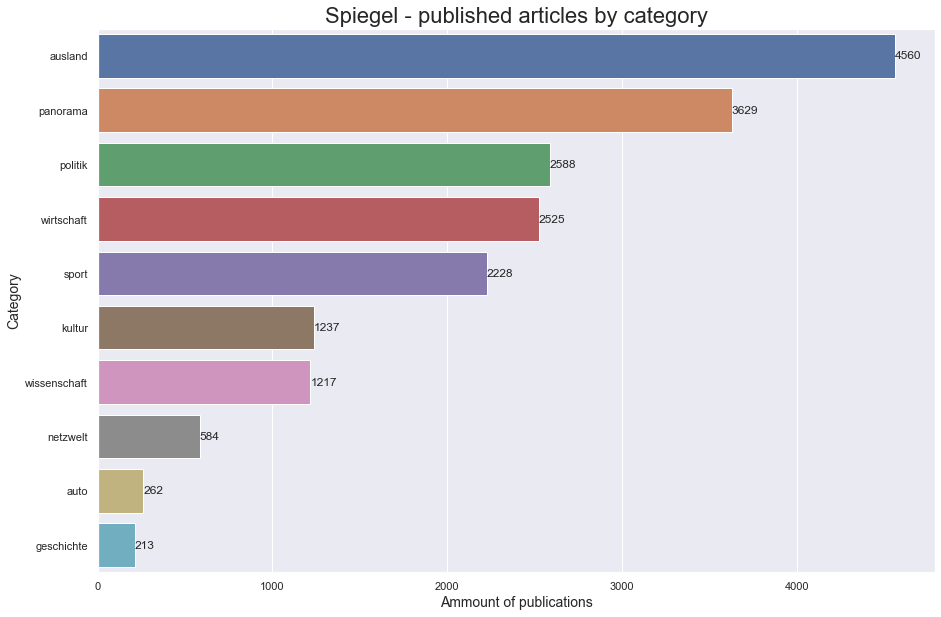

In [16]:
categories_spiegel = pd.DataFrame(Spiegel_DataFrame["Kategorie"].value_counts()[:10])

ax = sns.barplot(x = categories_spiegel.Kategorie, y=categories_spiegel.index,data=categories_spiegel,orient="h")
ax.bar_label(ax.containers[0])

plt.title("Spiegel - published articles by category",fontsize=22)
plt.xlabel('Ammount of publications', fontsize=14);
plt.ylabel('Category', fontsize=14);

save_fig(ax, "Category Analysis/Published articles by category Spiegel")

## Categories Sueddeutsche

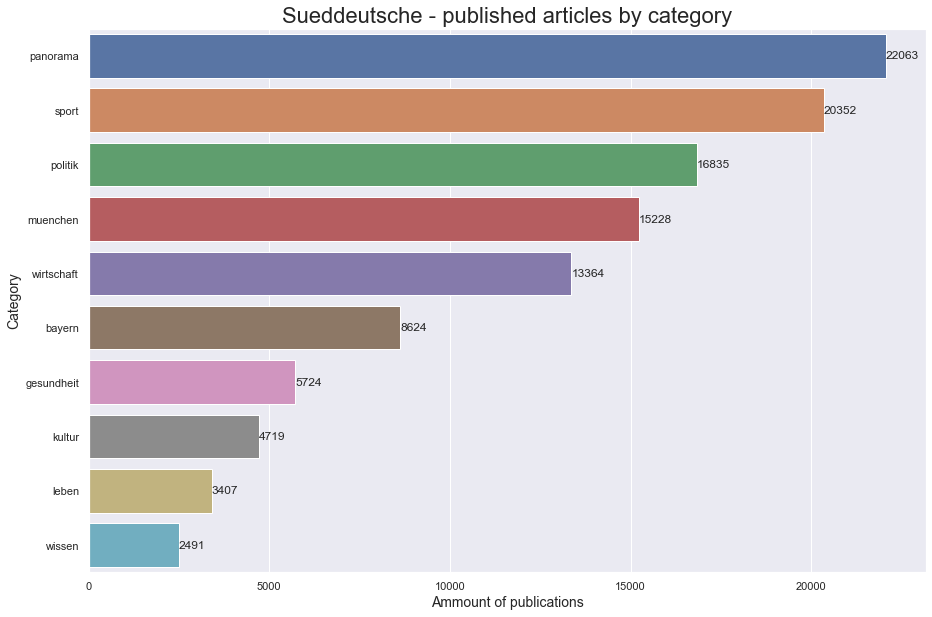

In [17]:
categories_sueddeutsche = pd.DataFrame(Sueddeutsche_DataFrame["Kategorie"].value_counts()[:10])

ax = sns.barplot(x = categories_sueddeutsche.Kategorie, y=categories_sueddeutsche.index,data=categories_sueddeutsche,orient="h")
ax.bar_label(ax.containers[0])

plt.title("Sueddeutsche - published articles by category",fontsize=22)
plt.xlabel('Ammount of publications', fontsize=14);
plt.ylabel('Category', fontsize=14);

save_fig(ax, "Category Analysis/Published articles by category Sueddeutsche")


In [18]:
categories_sueddeutsche = pd.DataFrame(Sueddeutsche_DataFrame["Kategorie"].value_counts())
print(categories_sueddeutsche[categories_sueddeutsche["Index"]==])

SyntaxError: invalid syntax (1542336920.py, line 2)

### Categories from dpa in sueddeutsche

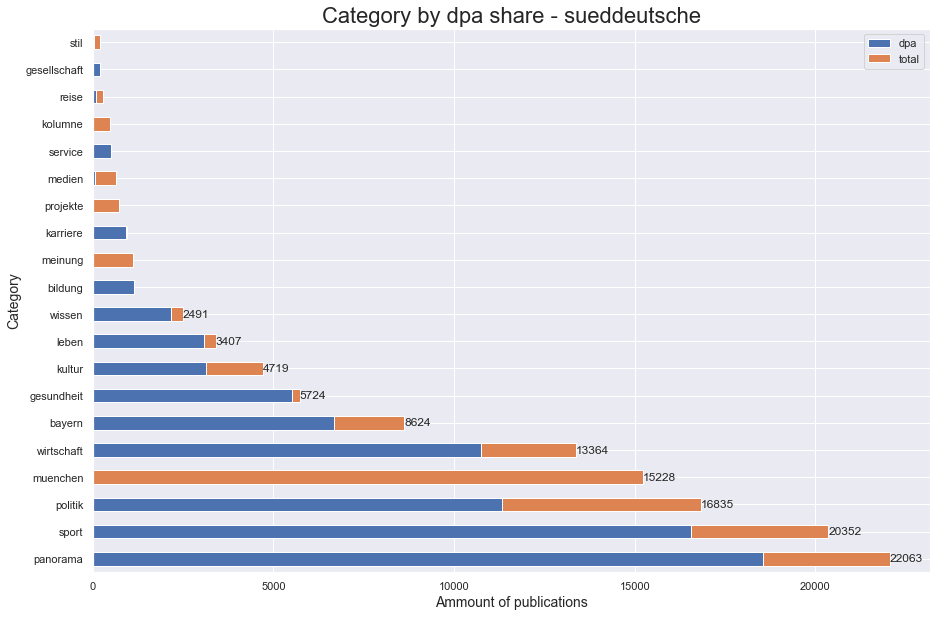

In [20]:
categories_sueddeutsche = pd.DataFrame(Sueddeutsche_DataFrame["Kategorie"].value_counts())
categories_sueddeutsche = categories_sueddeutsche.rename(columns={'Kategorie': 'Total'})

dpa_articles_sueddeutsche = Sueddeutsche_DataFrame[Sueddeutsche_DataFrame["Breadcrumb"]=="dpa"]
dpa_category = pd.DataFrame(dpa_articles_sueddeutsche["Kategorie"].value_counts())
dpa_category = dpa_category.rename(columns={"Kategorie": "dpa"})

#dpa_share = dpa_category*100/categories_sueddeutsche
#dpa_share.sort_values(by="Kategorie",ascending=False)
df = pd.concat([categories_sueddeutsche,dpa_category],axis=1)
df["Share"] = df.dpa * 100/df.Total
df.sort_values(by="Share",ascending=False)
df_plot = df.sort_values(by="Total",ascending=False)[:20]
df_plot["total"] =df_plot.Total.sub(df_plot.dpa)
df_plot["total"] = df_plot["total"].fillna(df_plot["Total"])

plot = df_plot[["dpa","total"]].plot.barh( stacked=True,)
plot.bar_label(ax.containers[0])

plt.title("Category by dpa share - sueddeutsche",fontsize=22)
plt.xlabel('Ammount of publications', fontsize=14);
plt.ylabel('Category', fontsize=14);

save_fig(plot, "Category Analysis/Category by dpa share")


## Categories Bild

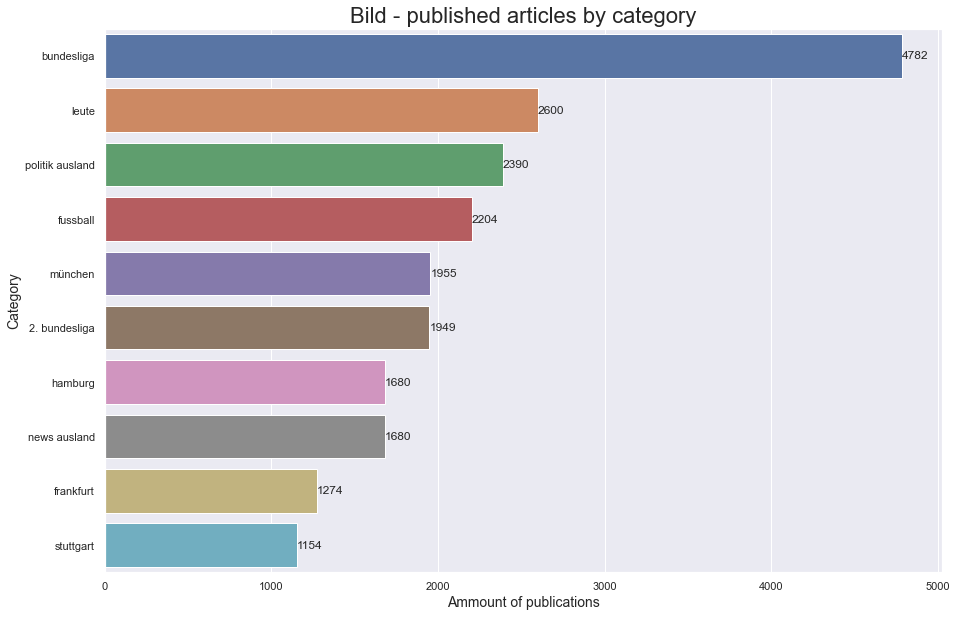

In [21]:
categories_bild = pd.DataFrame(Bild_DataFrame["Kategorie"].value_counts()[:10])
ax = sns.barplot(x = categories_bild.Kategorie, y=categories_bild.index,data=categories_bild,orient="h")
ax.bar_label(ax.containers[0])

plt.title("Bild - published articles by category",fontsize=22)
plt.xlabel('Ammount of publications', fontsize=14);
plt.ylabel('Category', fontsize=14);

save_fig(ax, "Category Analysis/Published articles by category Bild")

# KeyWords Analysis

## Highest occurring keyWords in news

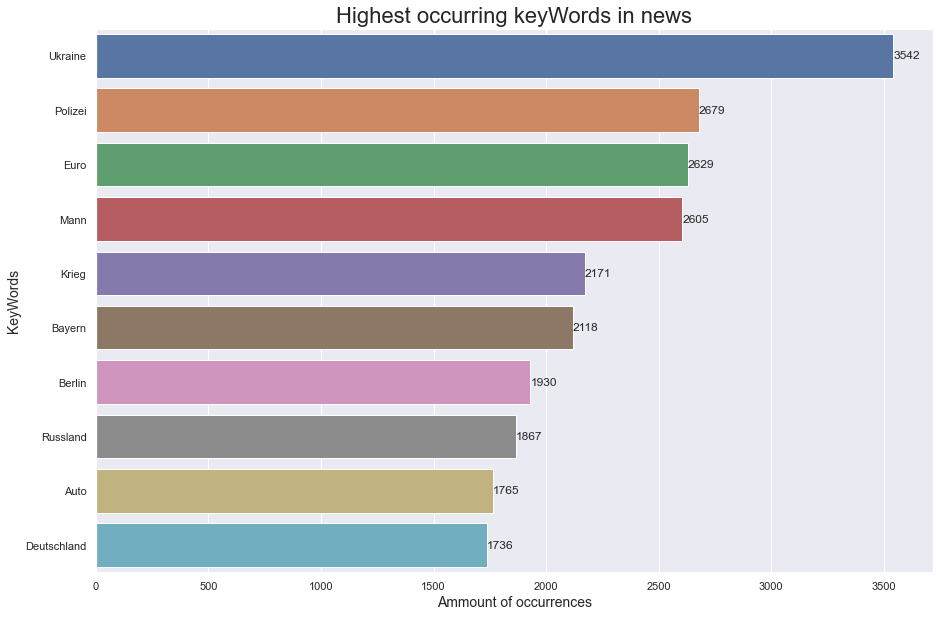

In [22]:
all_keyWords_occurence = pd.DataFrame(News_DataFrame_exploded.Tokens.value_counts()[:10])
ax = sns.barplot(x = "Tokens", y=all_keyWords_occurence.index,data=all_keyWords_occurence,orient="h")
ax.bar_label(ax.containers[0])

plt.title("Highest occurring keyWords in news",fontsize=22)
plt.xlabel('Ammount of occurrences', fontsize=14);
plt.ylabel('KeyWords', fontsize=14);

save_fig(ax, "KeyWord Analysis/Highest occurring keywords in news")

## Highest occurring keyWord by news media

### Highest occurring keyWord in Spiegel

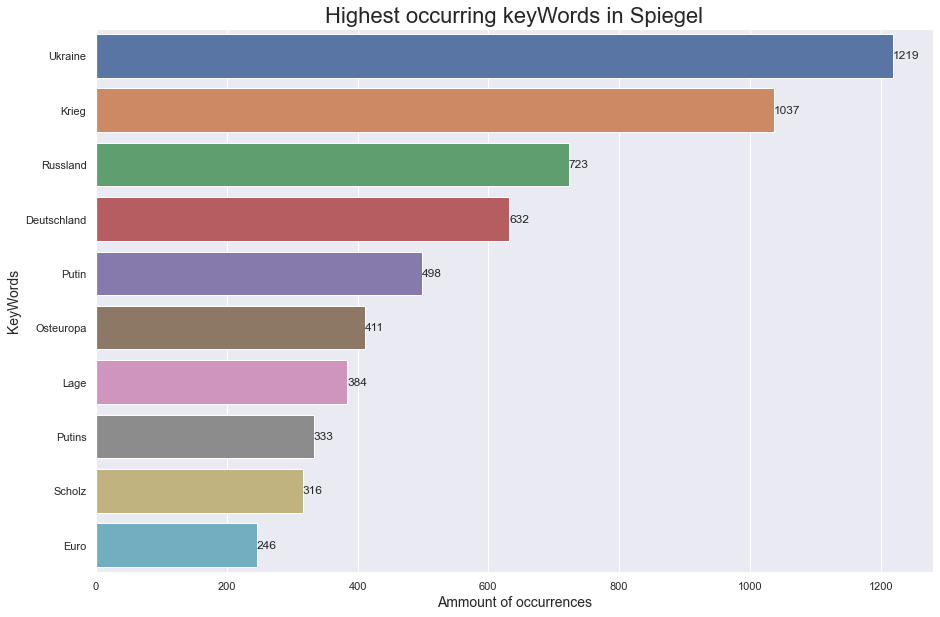

In [23]:
spiegel_keyWords_occurence = pd.DataFrame(Spiegel_DataFrame_exploded.Tokens.value_counts()[:10])
ax = sns.barplot(x = "Tokens", y=spiegel_keyWords_occurence.index,data=spiegel_keyWords_occurence,orient="h")
ax.bar_label(ax.containers[0])

plt.title("Highest occurring keyWords in Spiegel",fontsize=22)
plt.xlabel('Ammount of occurrences', fontsize=14);
plt.ylabel('KeyWords', fontsize=14);

save_fig(ax, "KeyWord Analysis/Highest occurring keywords in Spiegel")

### Highest occurring keyWord in Sueddeutsche

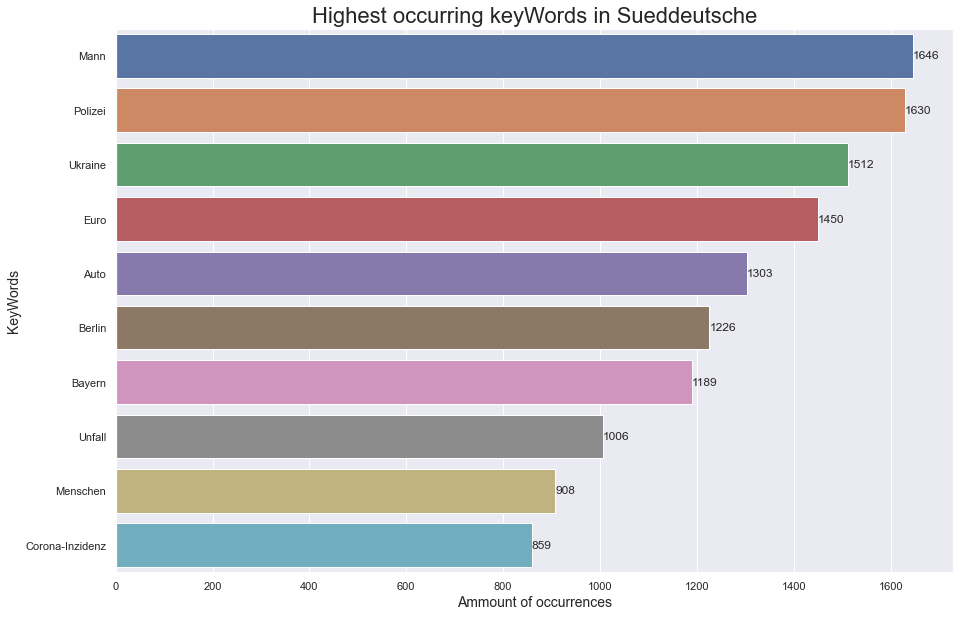

In [24]:
sueddeutsche_keyWords_occurence = pd.DataFrame(Sueddeutsche_DataFrame_exploded.Tokens.value_counts()[:10])
ax = sns.barplot(x = "Tokens", y=sueddeutsche_keyWords_occurence.index,data=sueddeutsche_keyWords_occurence,orient="h")
ax.bar_label(ax.containers[0])

plt.title("Highest occurring keyWords in Sueddeutsche",fontsize=22)
plt.xlabel('Ammount of occurrences', fontsize=14);
plt.ylabel('KeyWords', fontsize=14);

save_fig(ax, "KeyWord Analysis/Highest occurring keywords in Sueddeutsche")

### Highest occurring keyWord in Bild

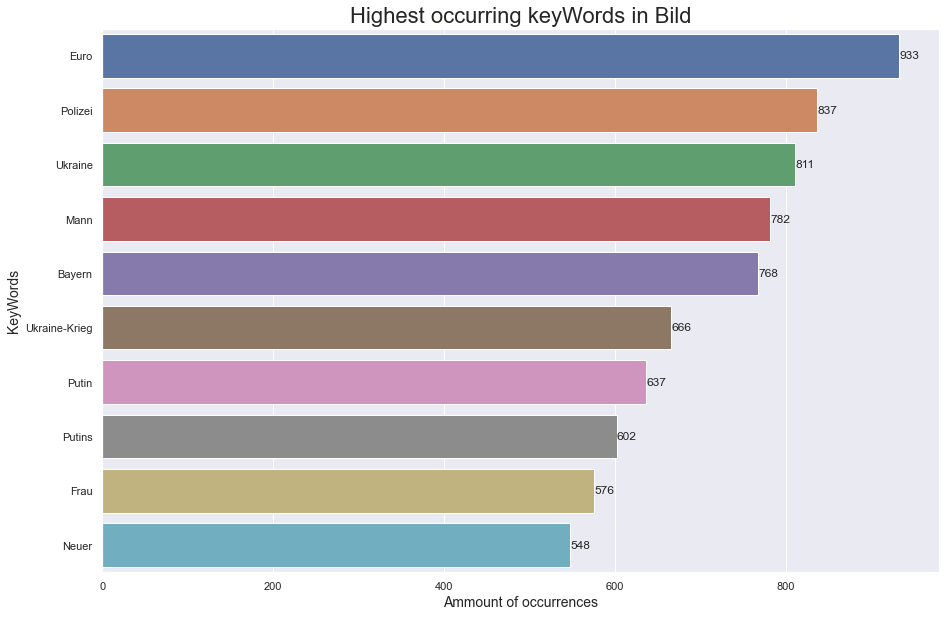

In [25]:
Bild_keyWords_occurence = pd.DataFrame(Bild_DataFrame_exploded.Tokens.value_counts()[:10])
ax = sns.barplot(x = "Tokens", y=Bild_keyWords_occurence.index,data=Bild_keyWords_occurence,orient="h")
ax.bar_label(ax.containers[0])

plt.title("Highest occurring keyWords in Bild",fontsize=22)
plt.xlabel('Ammount of occurrences', fontsize=14);
plt.ylabel('KeyWords', fontsize=14);

save_fig(ax, "KeyWord Analysis/Highest occurring keywords in Bild")

## Which keyWords occure most with the top keyWords in title over all media houses

Ukraine
Polizei
Euro
Mann
Krieg
Bayern
Berlin
Russland
Auto
Deutschland
Ukraine
Krieg
Russland
Deutschland
Putin
Osteuropa
Lage
Putins
Scholz
Euro
Mann


C:\Users\Jan\AppData\Local\Temp\ipykernel_20084\1194487002.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Polizei
Ukraine
Euro
Auto
Berlin
Bayern
Unfall
Menschen
Corona-Inzidenz
Euro
Polizei
Ukraine
Mann
Bayern
Ukraine-Krieg
Putin
Putins
Frau
Neuer


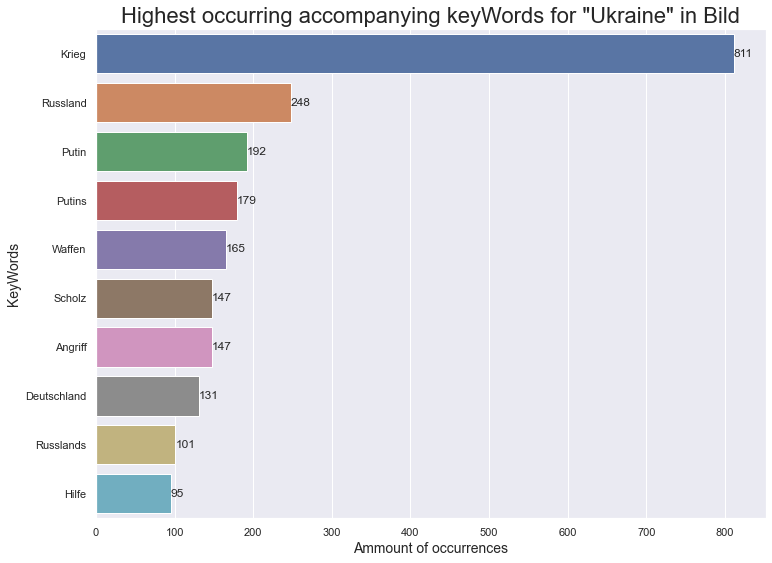

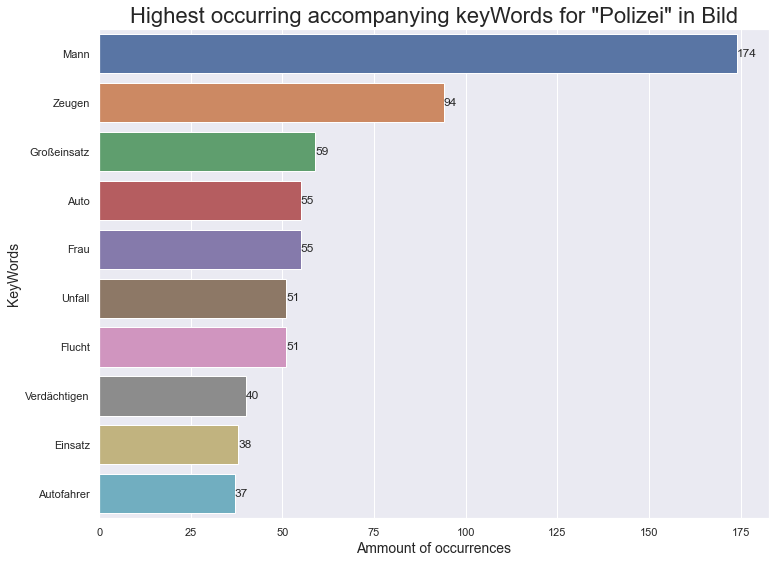

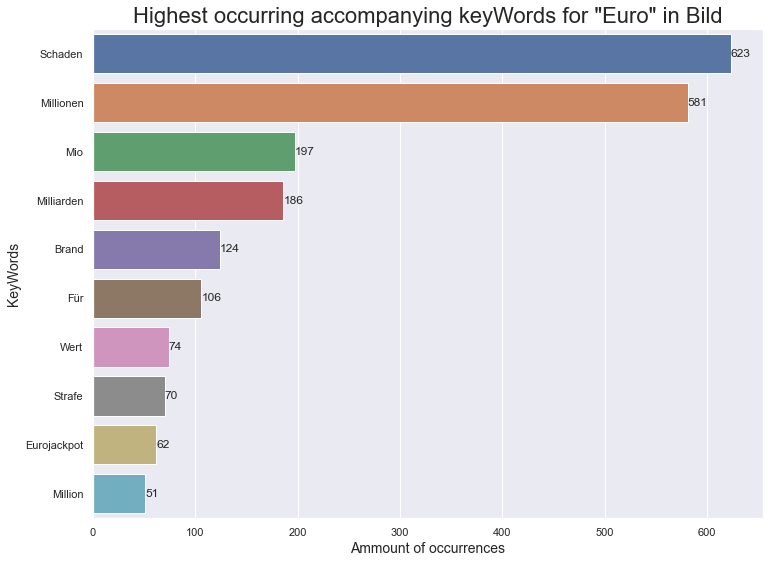

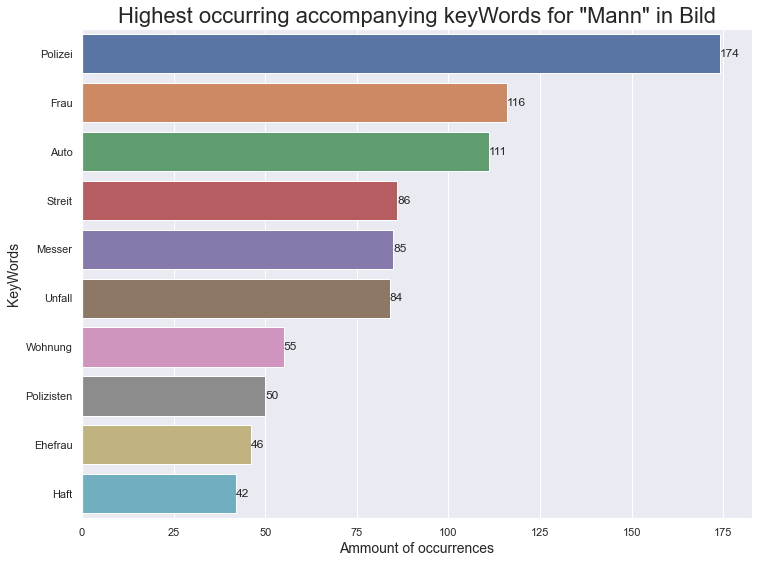

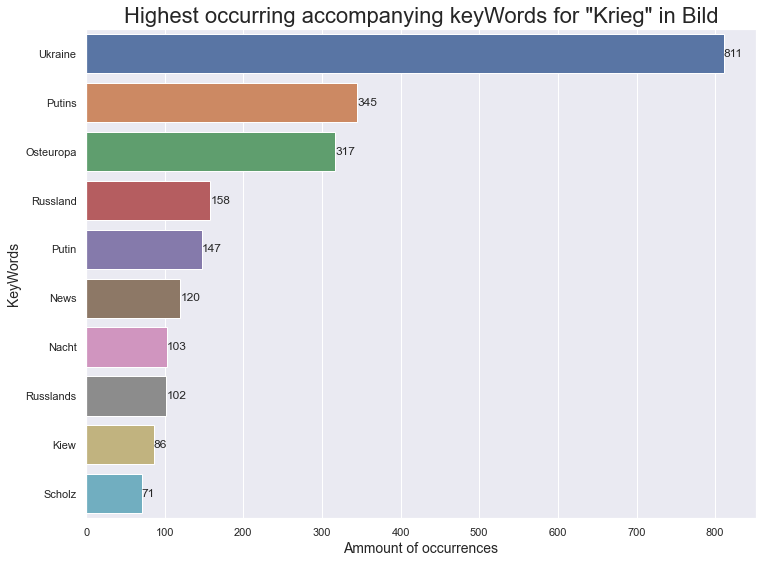

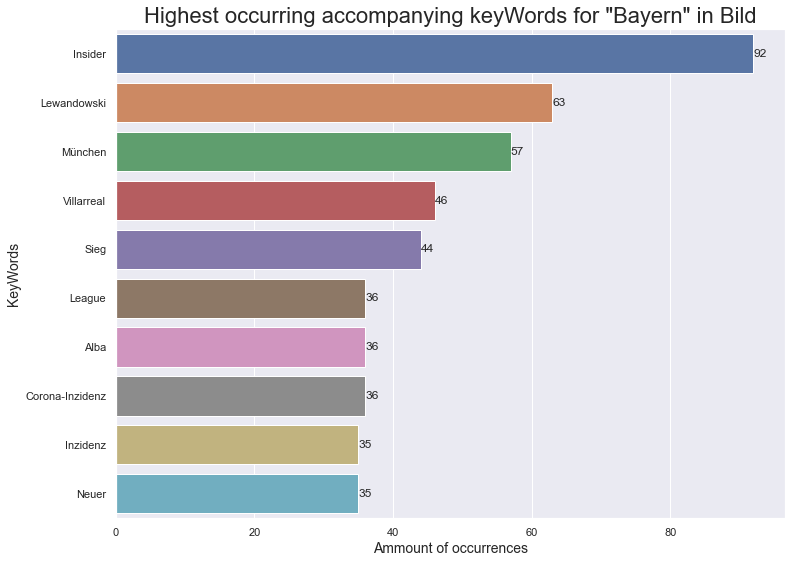

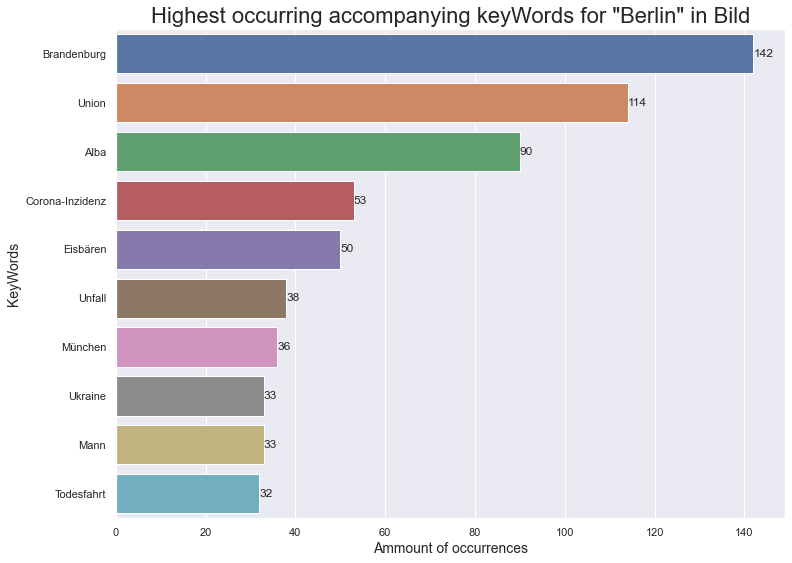

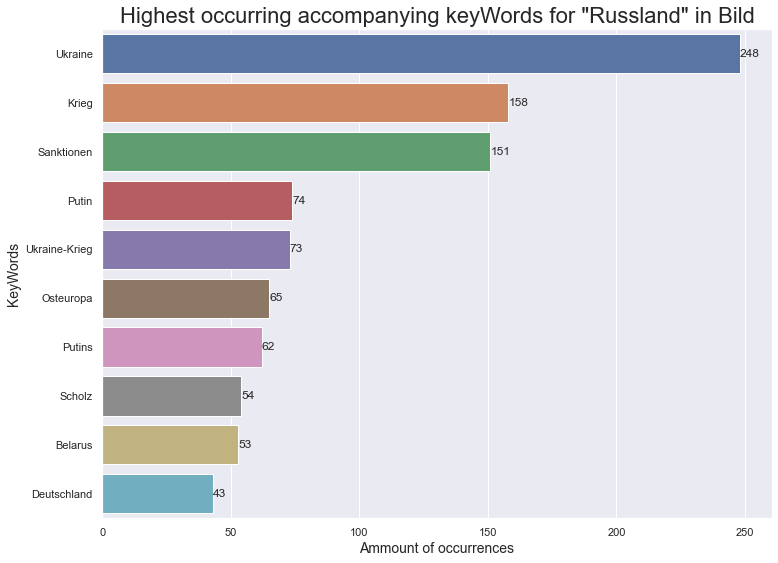

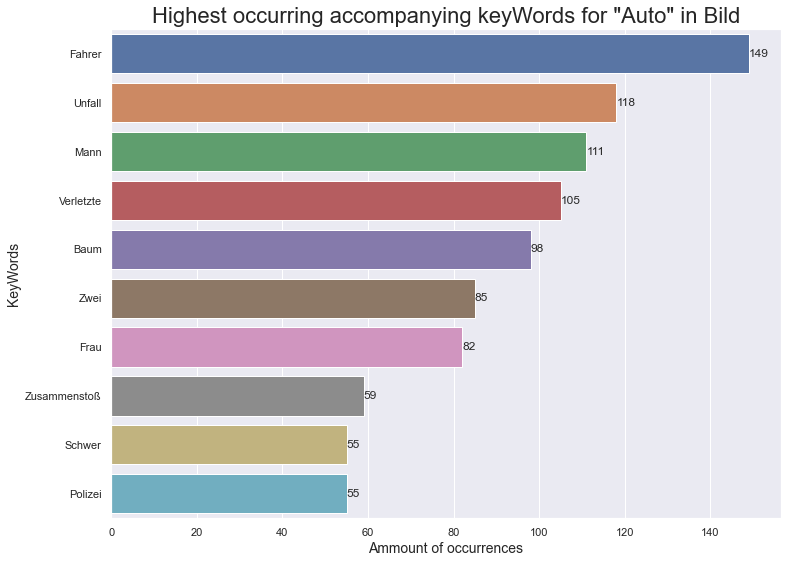

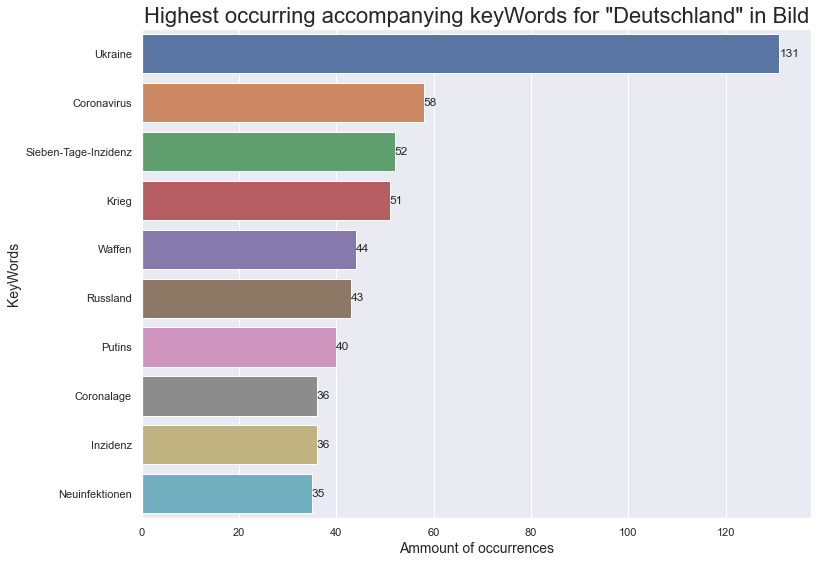

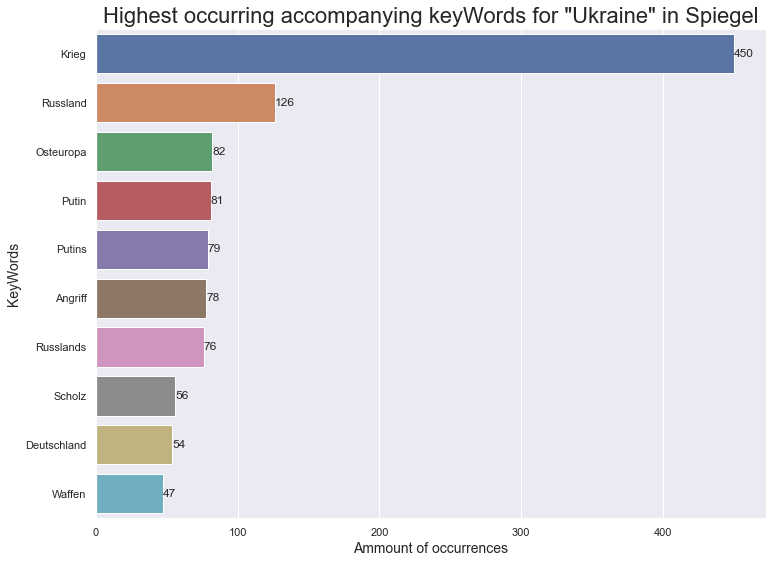

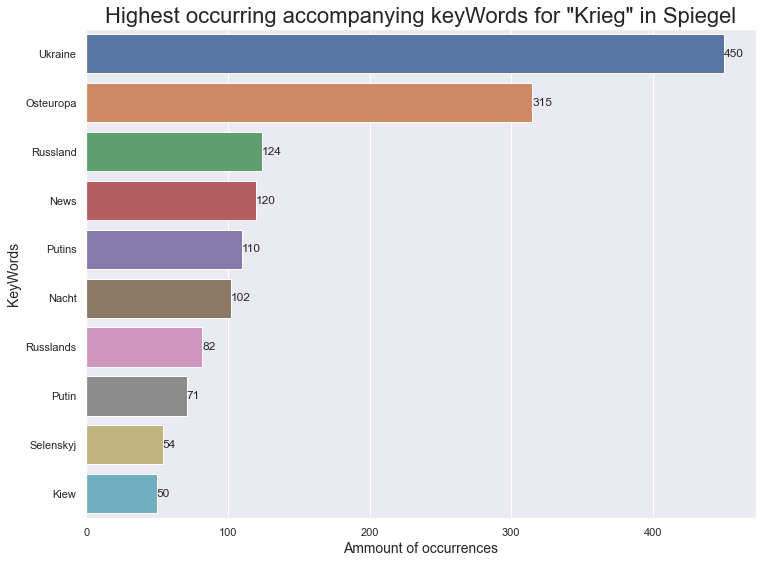

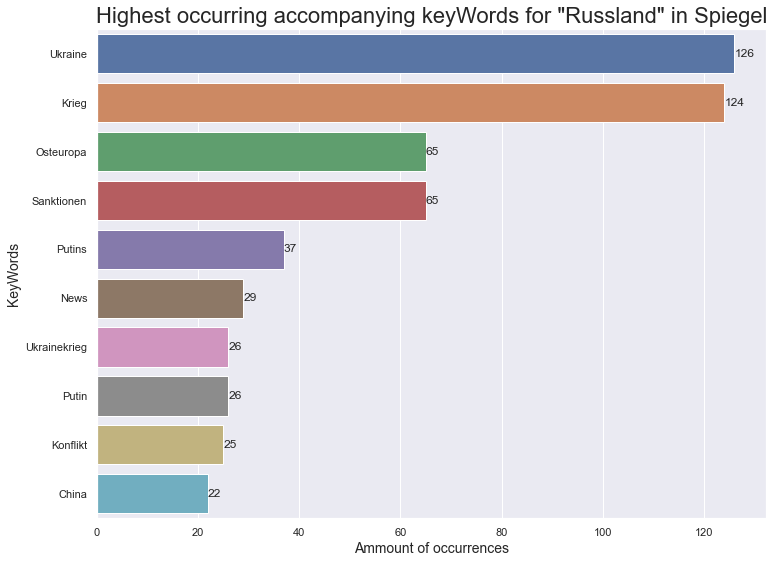

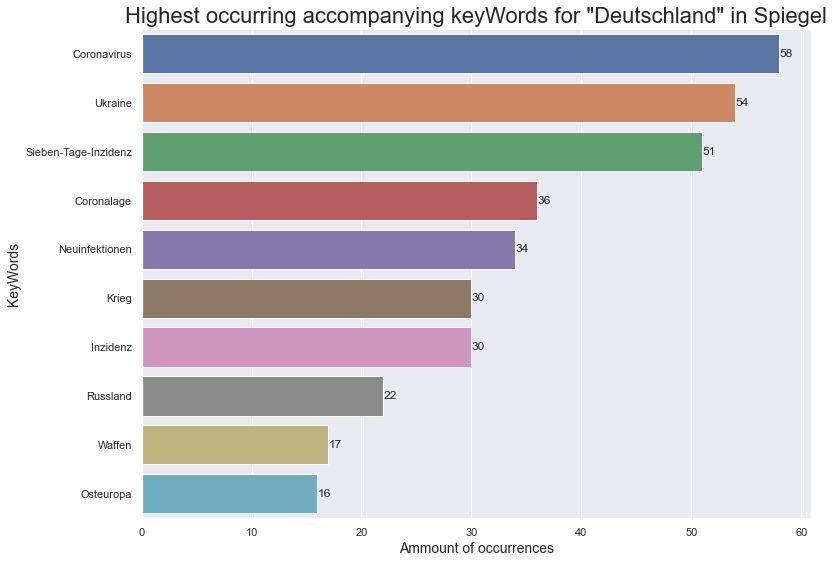

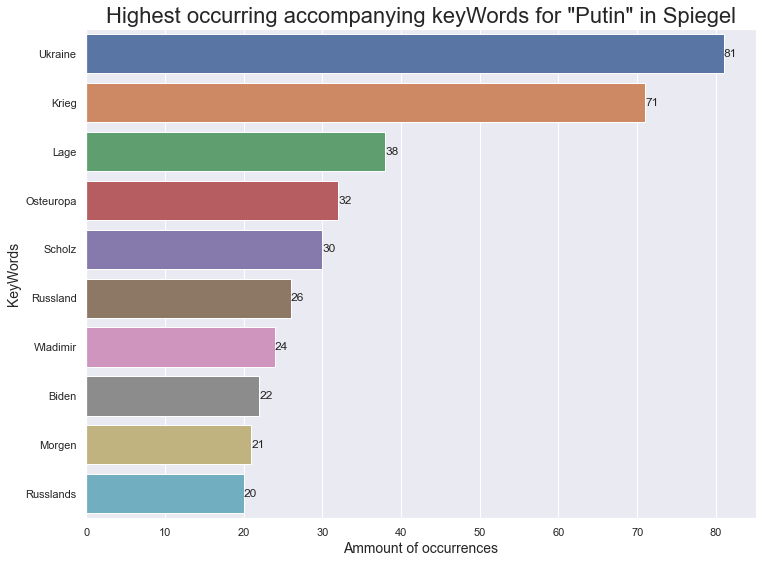

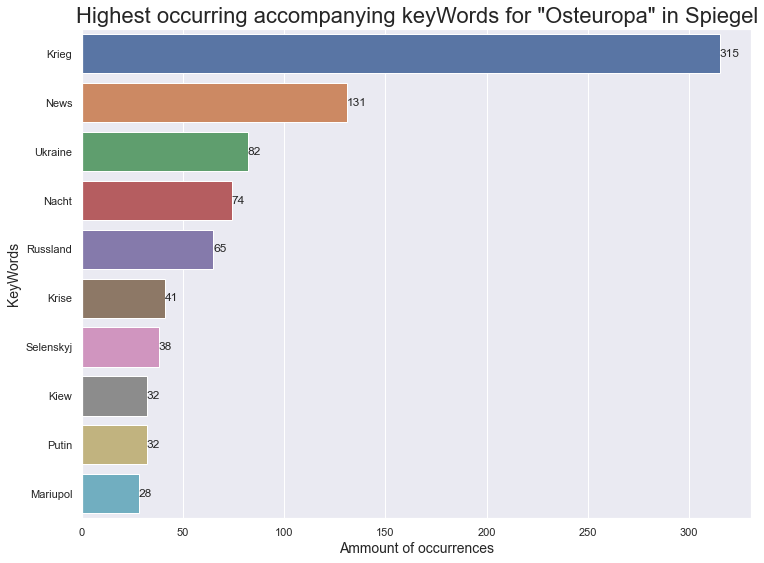

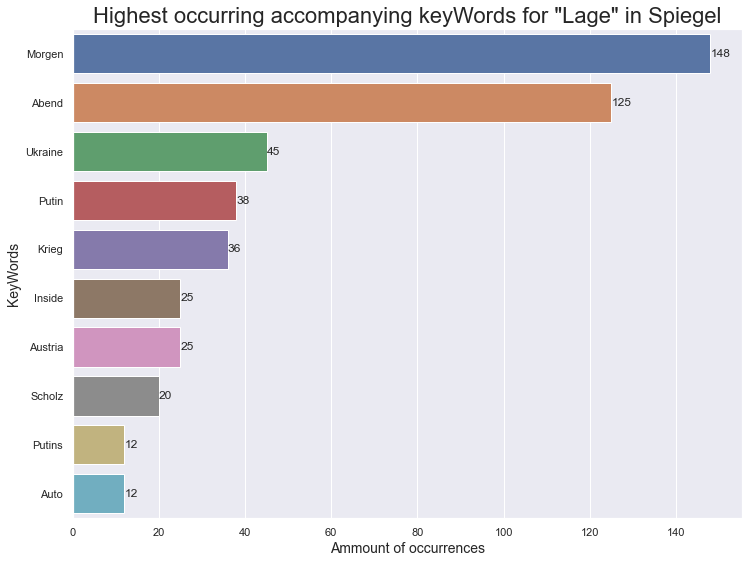

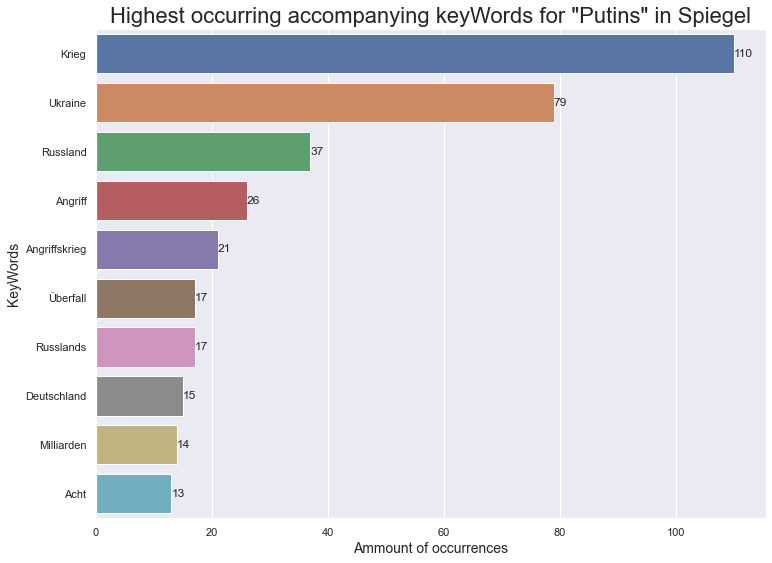

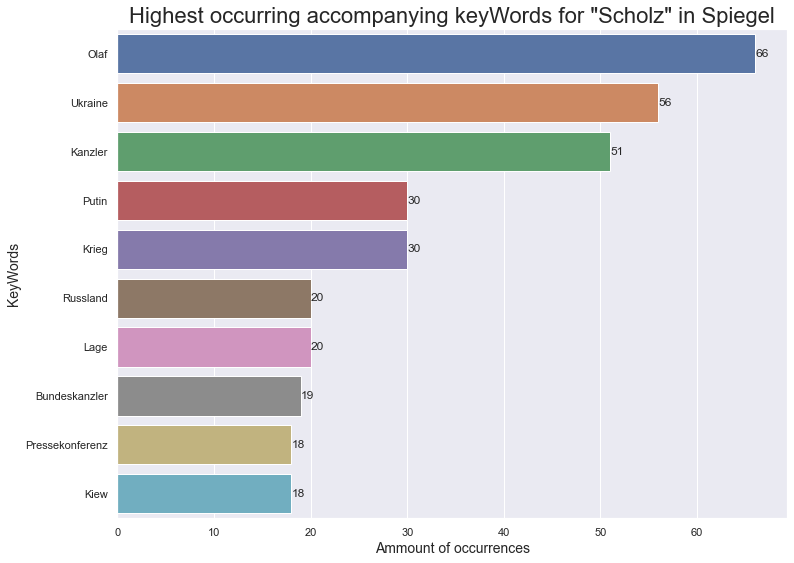

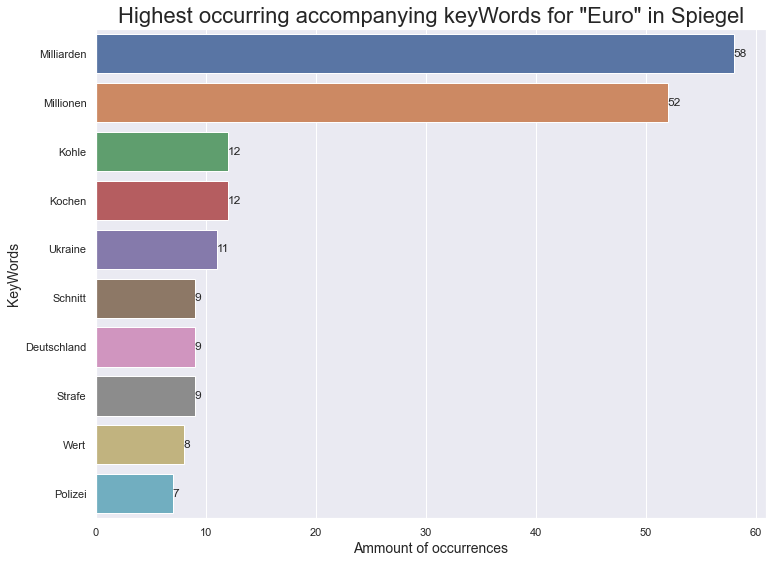

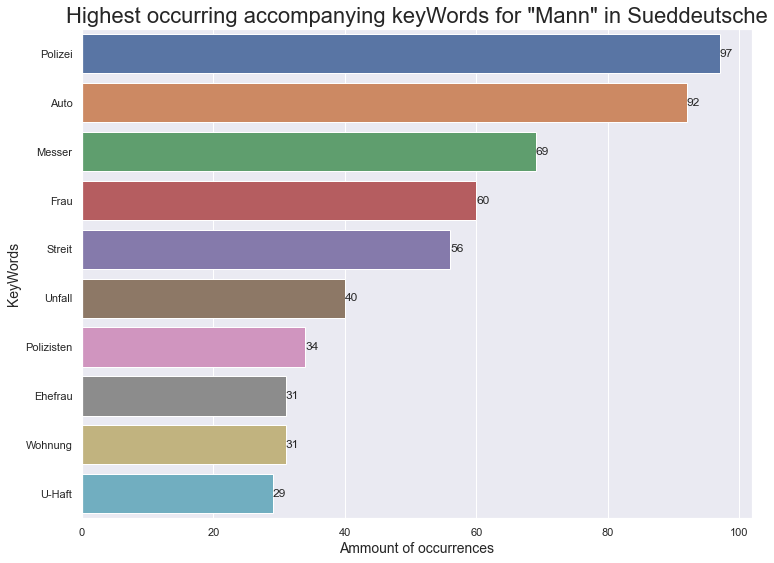

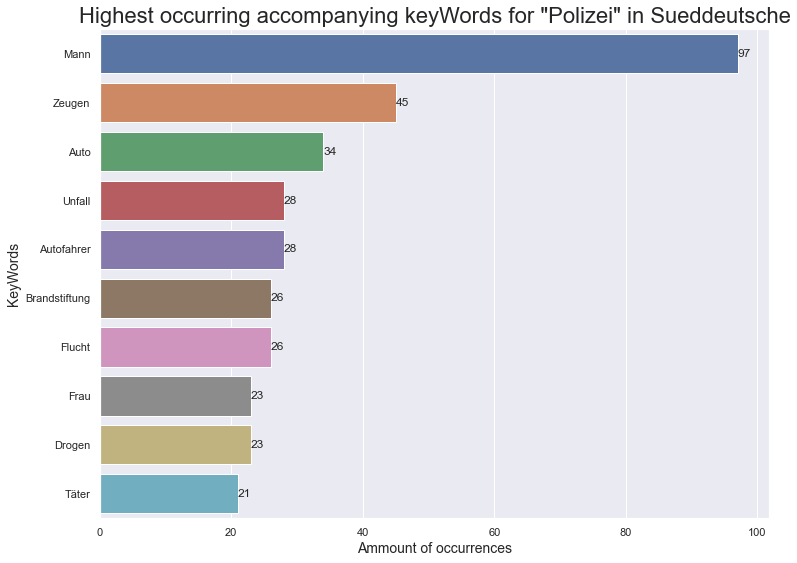

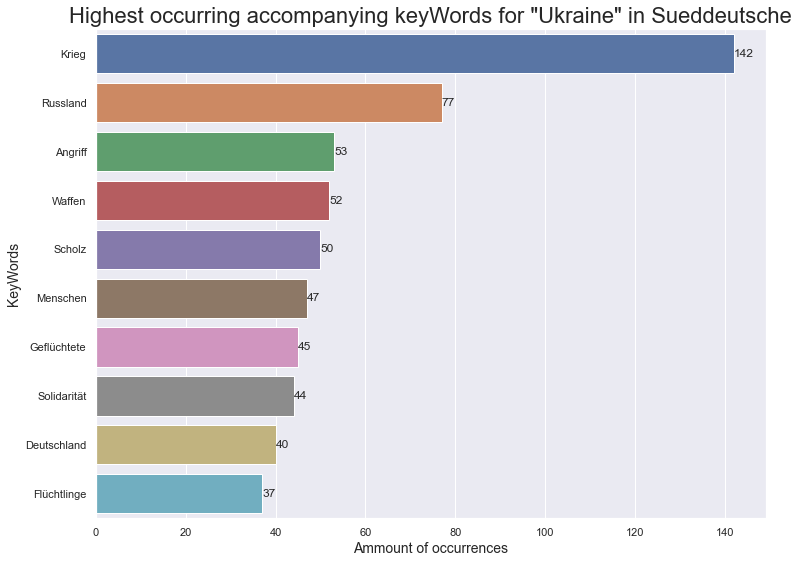

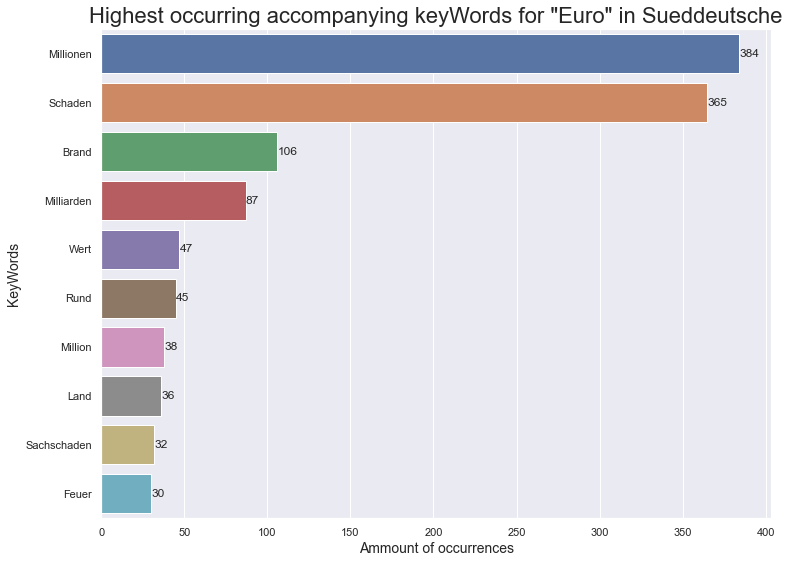

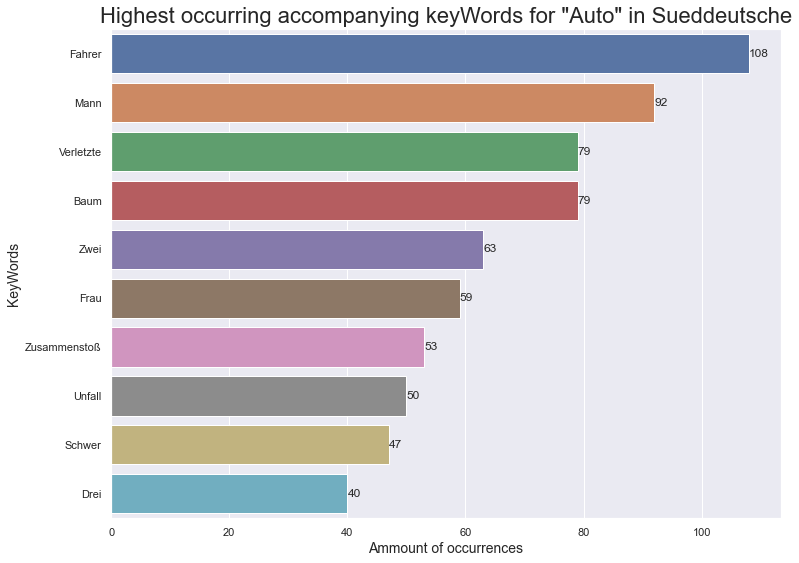

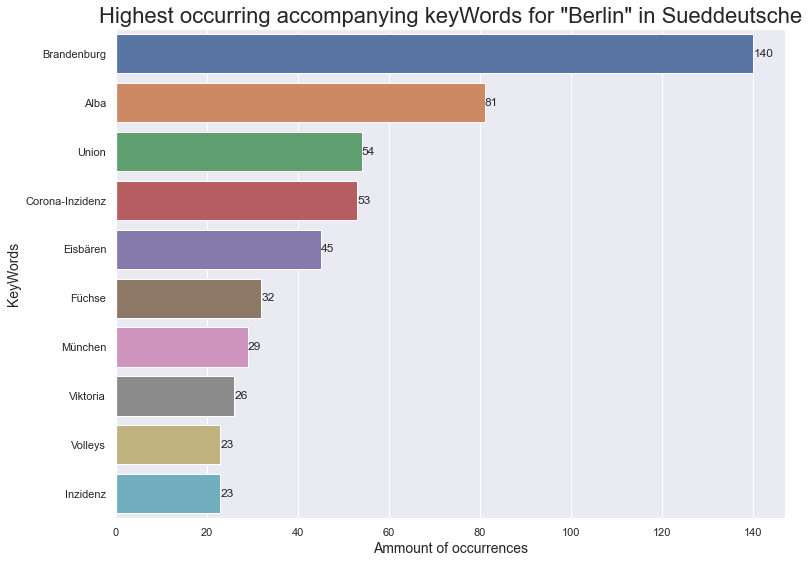

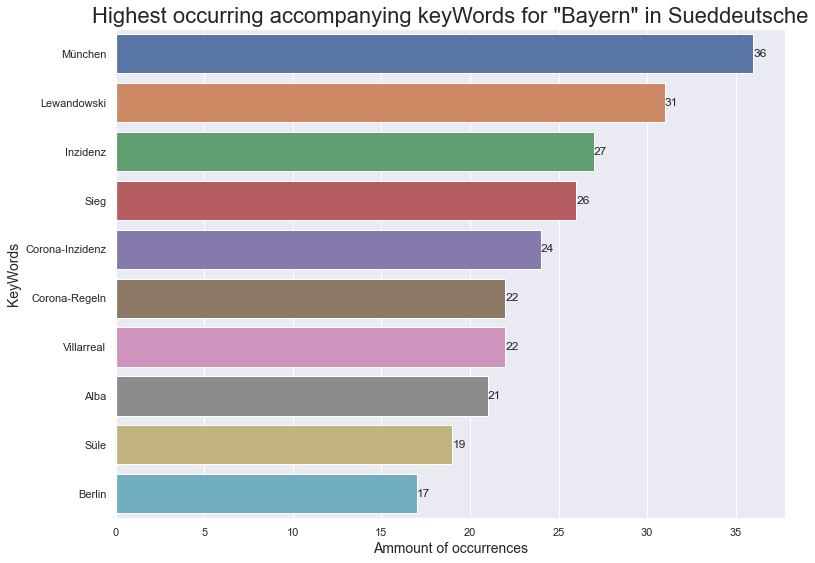

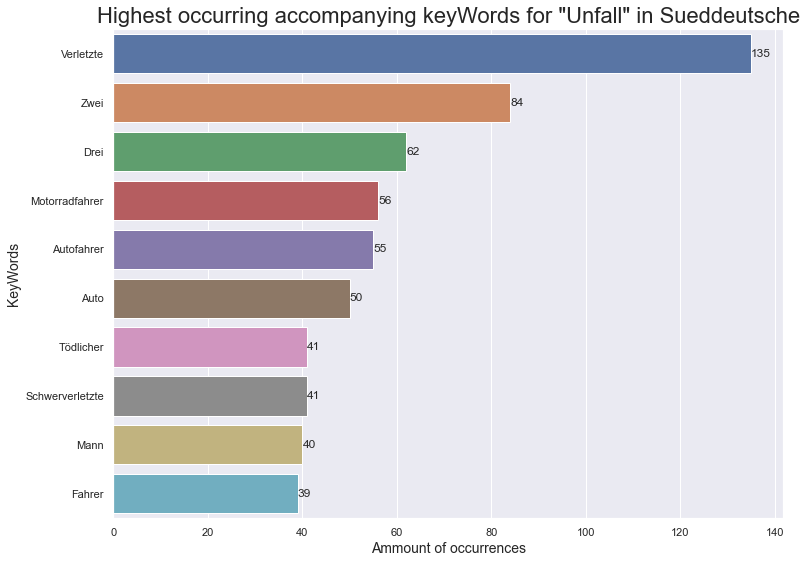

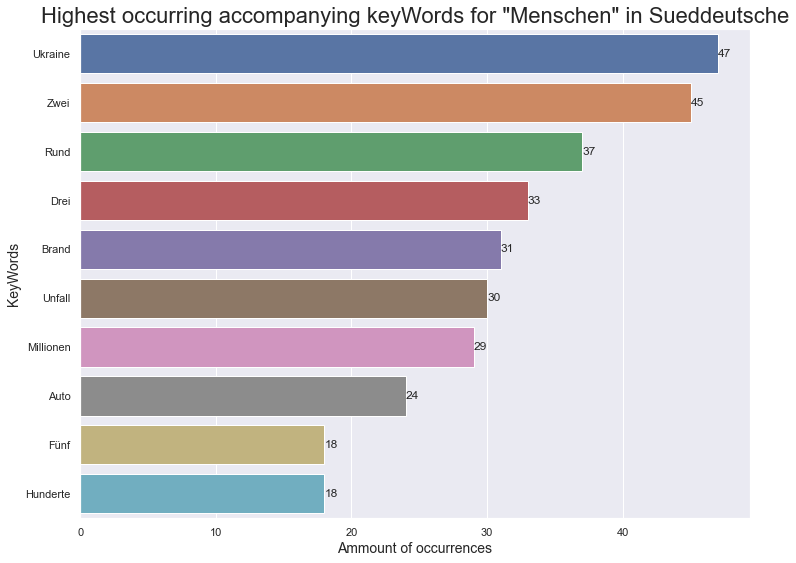

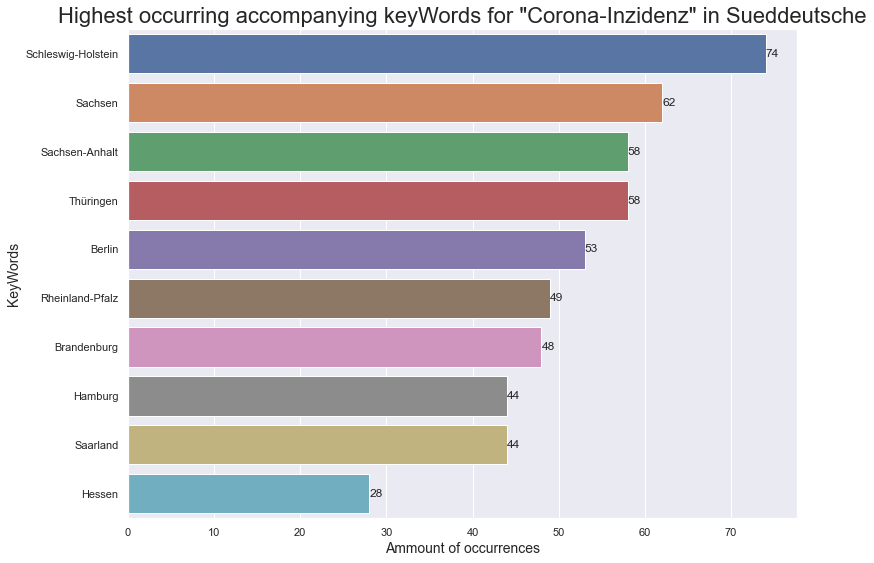

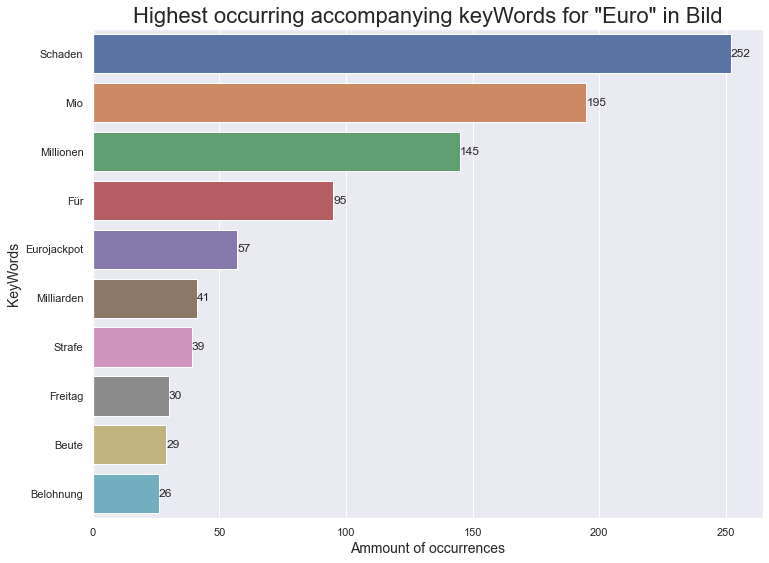

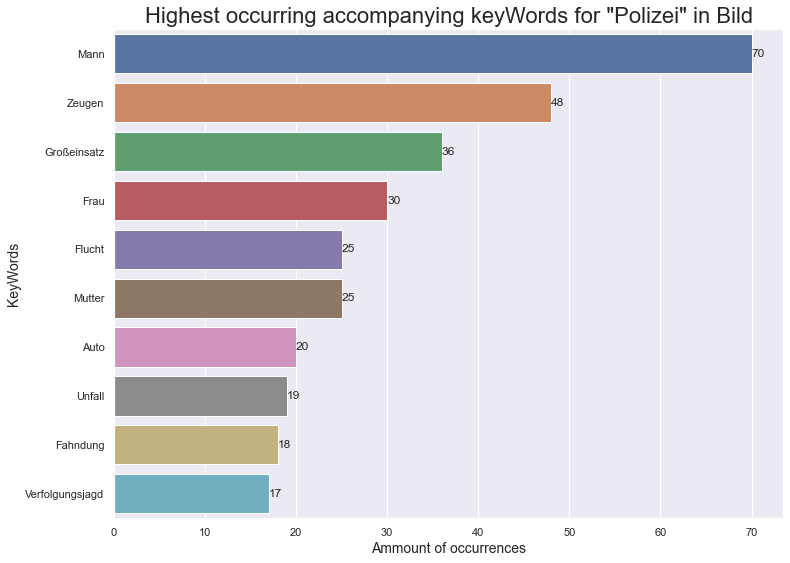

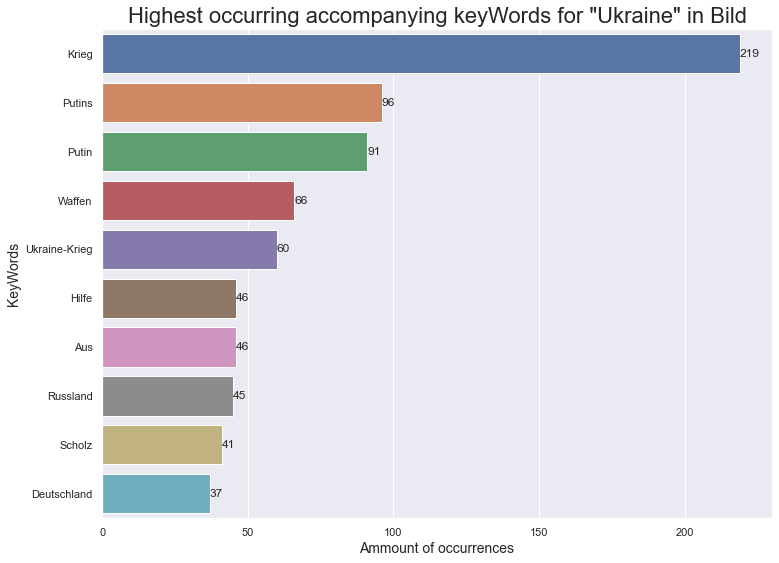

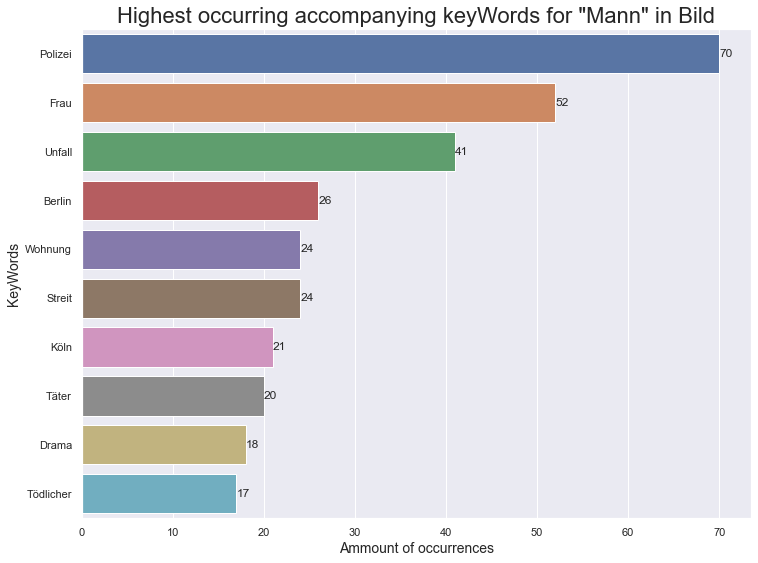

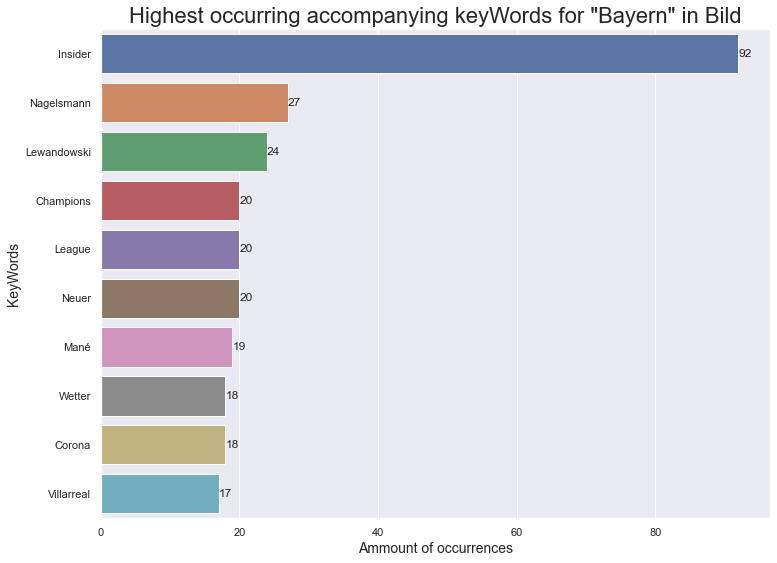

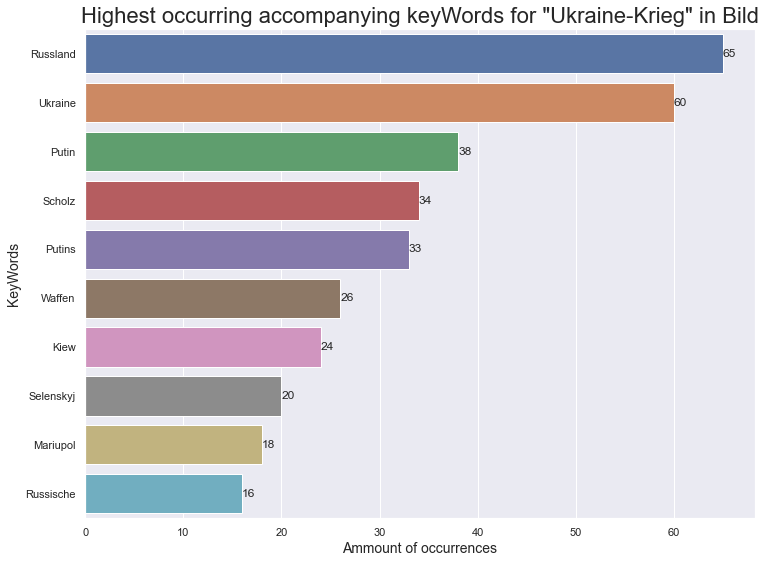

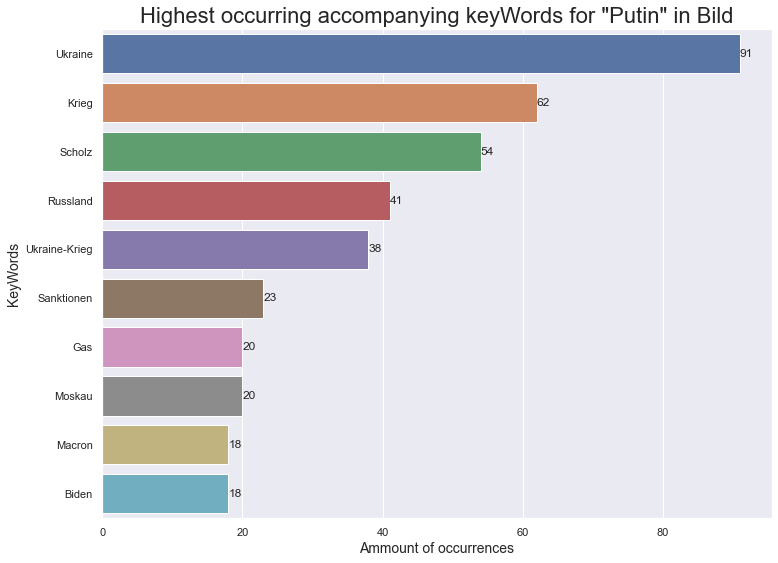

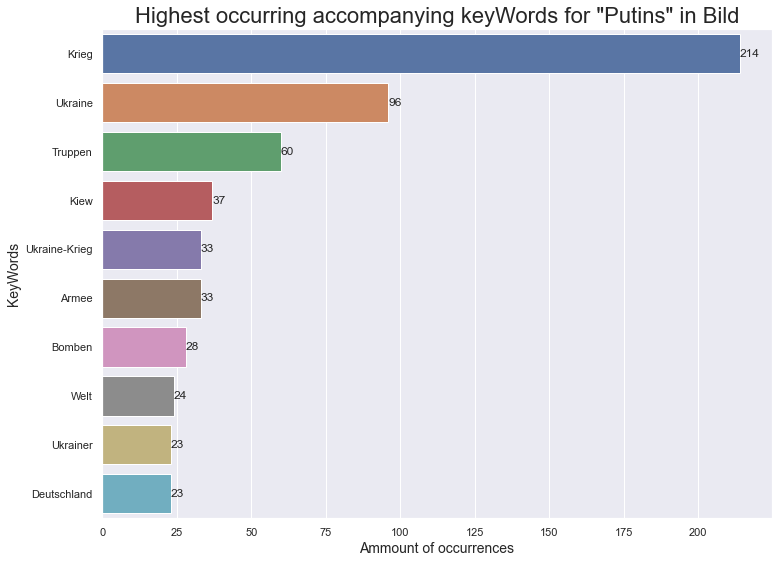

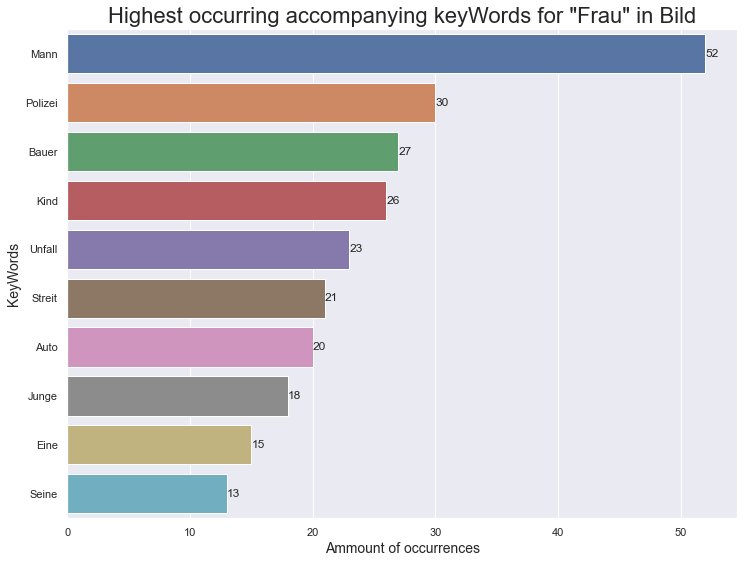

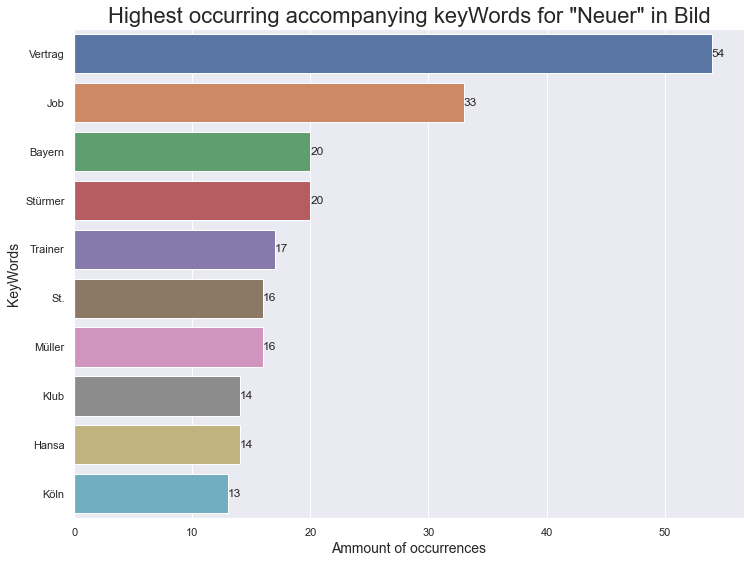

In [26]:
def get_accompanying_keyWords(keyWords, dataFrame):
    media_house = pd.DataFrame(dataFrame.News_page).reset_index().loc[0]["News_page"]
    sns.set(rc={'figure.figsize':(12,9)})
    for keyWord in keyWords:
        print(keyWord)
        # get all articles of interest
        Titel_interesting = pd.DataFrame(dataFrame.loc[dataFrame["Tokens"] == keyWord].Titel)

        # tokenize
        Titel_interesting["Tokens"] = Titel_interesting.apply(lambda row: nltk.word_tokenize(row['Titel']), axis=1)

        # explode
        Titel_interesting = Titel_interesting.explode("Tokens")

        # remove stopwords #1
        Titel_interesting = Titel_interesting[~Titel_interesting['Tokens'].isin(stopwords.words("german"))]
        # more stopwords
        # continues extension
        uninteresting_titles= ["Der", "Die", "Das","Was","Warum","Er","Sie", "Es", "Ich", "Du", "Mit","Wie","Ein","So","Wir","Nach","Am","An","B","Bei","Beim","Bin","Bis","Co","Da","Hier","Diese","Darum","Mehr","Jetzt","Wer","A","C",":","»","«", "," ,"\'\'","``", "_","-" ".","?","–", "-",".","!","(",")","„","“","<",">","außer","Wenn","Alles","In","Neue","Wegen", keyWord]
        Titel_interesting=Titel_interesting[~Titel_interesting.Tokens.isin(uninteresting_titles)]

        # remove words that start with lower
        Titel_interesting = Titel_interesting[Titel_interesting["Tokens"].str.istitle()]

        accompanying_keyWords = pd.DataFrame(Titel_interesting.Tokens.value_counts())[:10]

        plt.figure()
        plt.ion()
        ax = sns.barplot(x = "Tokens", y=accompanying_keyWords.index,data=accompanying_keyWords,orient="h");
        ax.bar_label(ax.containers[0])

        plt.title(f"Highest occurring accompanying keyWords for \"{keyWord}\" in {media_house}",fontsize=22)
        plt.xlabel('Ammount of occurrences', fontsize=14);
        plt.ylabel('KeyWords', fontsize=14);

        figure = ax.get_figure()
        figure.savefig(f"C:/Users/Jan/Documents/Python_Projects/Bachelorthesis/Bachelorthesis/Analysis/Plots/Basic Analysis/Accompanying Keywords/{media_house}/accompanying keywords for {keyWord} in {media_house}.png",bbox_inches='tight')

#All media houses
get_accompanying_keyWords(all_keyWords_occurence.index.tolist(), News_DataFrame_exploded)

# Spiegel
get_accompanying_keyWords(spiegel_keyWords_occurence.index.tolist(), Spiegel_DataFrame_exploded)

# Sueddeutsche
get_accompanying_keyWords(sueddeutsche_keyWords_occurence.index.tolist(), Sueddeutsche_DataFrame_exploded)

# Bild
get_accompanying_keyWords(Bild_keyWords_occurence.index.tolist(), Bild_DataFrame_exploded)

In [27]:
def save_fig(ax, path):
    sns.set(rc={'figure.figsize':(15,10)})
    figure = ax.get_figure()
    figure.savefig(f"C:/Users/Jan/Documents/Python_Projects/Bachelorthesis/Bachelorthesis/Analysis/Plots/Basic Analysis/{path}.png",bbox_inches='tight',dpi=500)